# Analysis of The King: Eternal Monarch 

### Overview

We aim to perform sentiment analysis on korean drama reviews from a website by utilising web scraping. The title of the korean drama we will be analysing is The King: Eternal Monarch. The data is scraped from http://asianwiki.com/The_King:_Eternal_Monarch.

##### Steps:
1. Scraping and processing text
2. Exploratory data analysis
3. Analysis of viewership ratings
4. Sentiment analysis

### 1. Scraping and processing text

In [1]:
import requests
import bs4
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
result = requests.get('http://asianwiki.com/The_King:_Eternal_Monarch')

In [3]:
soup = bs4.BeautifulSoup(result.text)

Comments are categorised under the class "comment-item". Hence, we can use this knowledge to select all the reviews from the html.

In [4]:
reviews = soup.select('.comment-item')

In [5]:
# Extracting text 
review_text = [review.text for review in reviews]

In [6]:
# Using regular expression to clean text 
clean = []
for review in review_text:
    review = ''.join(re.findall('[^\n]+',review))
    clean.append(re.sub('\S+\s\D{3}\s\d{2}\s\d{4}\s\d{1,2}\W\d{2}\s\D{2}\s','',review))
                            # Pattern that represents timestamp  
                            # E.g. Jun 30 2020 1:51 am 

In [7]:
review_text[1]

'\nIpti Jun 29 2020 2:21 am \nWorth watching, the story was nice and the actors did a great job\n\n'

In [8]:
clean[1]

'Worth watching, the story was nice and the actors did a great job'

As seen above, '\n', the timestamp and userID (Ipti Jun 29 2020 2:21 am) is removed after cleaning the text.

In [9]:
df = pd.DataFrame(clean,columns = ['Review'])

In [10]:
df.head()

,Review
0,I've just finished watching Mr.Sunshine. Altho...
1,"Worth watching, the story was nice and the act..."
2,Done watching it with a smile...
3,Kdrama Addict I love the story... I watched Le...
4,One thing that turned me down about this movie...


### 2. Exploratory data analysis

In [11]:
max_len = df['Review'].str.split().str.len().max()
print('Maximum number of words in a review: ', max_len)

Maximum number of words in a review:  1211


In [12]:
df[df['Review'].str.split().str.len() == 1211]

,Review
16,"SPOILERAbout the scar, what a bummer. They mad..."


In [13]:
# Taking a look at the longest review
df.iloc[16,0]

'SPOILERAbout the scar, what a bummer. They made such a big deal out of it then I felt like they dropped the ball on it. Ok, here\'s some more thoughts ...Yo-Yo Boy (Aka: the spirit of the Manpasikjeok)He is basically the gate keeper and controls access to all the parallel worlds. He has the ability to appear in any physical form (young or older) and moves between worlds at will. Whichever physical form he appears in is probably dependent on what he needs to accomplish.The Yo-Yo I\'m surprise no one has mentioned the yo-yo and what is its purpose. Here\'s my 2 cents on this topic. Basically, the yo-yo represents the parallel worlds. You always see the boy constantly moving the yo-yo. This is symbolic of him doing his basic function which is to keep the parallel worlds in perpetual motion and in balance. Think of each of the two discs of the yo-yo as parallel world opposites separated from each other by a string and Yo-Yo boy is there to ensure all worlds are in balance and working the 

Text(0, 0.5, 'Count')

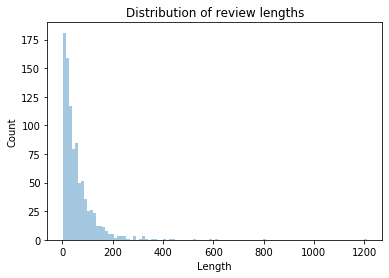

In [14]:
sns.distplot(pd.DataFrame(df['Review'].str.split().str.len()),kde=False,bins=100)
plt.title('Distribution of review lengths')
plt.xlabel('Length')
plt.ylabel('Count')

In [15]:
# Removing reviews that are too long
df = df[df['Review'].str.split().str.len() < 200]

Text(0, 0.5, 'Count')

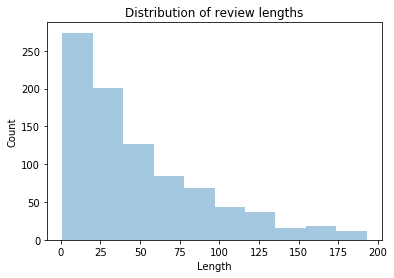

In [16]:
sns.distplot(pd.DataFrame(df['Review'].str.split().str.len()),kde=False,bins=10)
plt.title('Distribution of review lengths')
plt.xlabel('Length')
plt.ylabel('Count')

In [17]:
# Importing libraries for wordcloud
from wordcloud import WordCloud, STOPWORDS

In [18]:
words = ''.join(review for review in df['Review'])

In [19]:
stopwords = set(STOPWORDS)

In [20]:
# Adding extra stopwords 
stopwords.update(['drama','episode','ep','scene','really','story'])

In [21]:
wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(words)

(-0.5, 399.5, 199.5, -0.5)

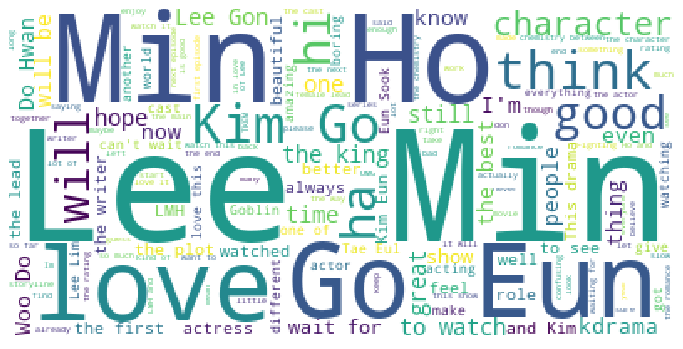

In [22]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")

The wordcloud shows that the most common words in each review are the names of the two main characters, Lee Min Ho and Kim Go Eun. Positive keywords such as love, good and great are also reflected.

### 3. Analysis of viewership ratings 

Viewership ratings represent the most watched and most popular korean dramas during their broadcast timeslot. The higher the viewership ratings, the better.

In [23]:
table = pd.read_html('http://asianwiki.com/The_King:_Eternal_Monarch')

In [24]:
ratings = table[30]

In [25]:
ratings

Date Episode          AGB             
          Date Episode   Nationwide        Seoul
0   2020-04-17       1  10.1% (7th)  11.4% (5th)
1   2020-04-17       1  11.4% (4th)  12.9% (4th)
2   2020-04-18       2   8.4% (7th)   9.7% (5th)
3   2020-04-18       2  11.6% (3rd)  12.9% (3rd)
4   2020-04-24       3  7.8% (11th)  8.2% (12th)
5   2020-04-24       3   9.0% (7th)   9.4% (5th)
6   2020-04-25       4   8.0% (9th)   8.8% (6th)
7   2020-04-25       4   9.7% (4th)  10.1% (4th)
8   2020-05-01       5  7.6% (11th)   8.2% (6th)
9   2020-05-01       5   8.6% (6th)   9.3% (4th)
10  2020-05-02       6   7.4% (8th)   7.9% (6th)
11  2020-05-02       6  10.3% (4th)  10.5% (3rd)
12  2020-05-08       7  7.0% (11th)  7.3% (10th)
13  2020-05-08       7   8.1% (7th)   8.7% (7th)
14  2020-05-09       8  6.1% (17th)  6.8% (13th)
15  2020-05-09       8   8.1% (9th)   8.5% (5th)
16  2020-05-15       9  5.8% (17th)  6.3% (15th)
17  2020-05-15       9  6.3% (14th)  7.0% (13th)
18  2020-05-16      10  6.4% (16th)  7.3% (10th)
19  2020-05-16      10   7.8% (8th)   8.7% (5th)
20  2020-05-22      11  5.2% (20th)  5.6% (19th)
21  2020-05-22      11  6.6% (12th)  6.8% (11th)
22  2020-05-23      12  6.1% (15th)  6.6% (13th)
23  2020-05-23      12   8.1% (6th)   8.5% (5th)
24  2020-05-30      13         5.6%            -
25  2020-05-30      13   7.7% (8th)   8.2% (8th)
26  2020-06-05      14  5.7% (15th)  6.5% (12th)
27  2020-06-05      14  6.7% (11th)  7.5% (10th)
28  2020-06-06      15  5.9% (16th)  6.8% (11th)
29  2020-06-06      15   8.1% (7th)   8.5% (7th)
30  2020-06-12      16  5.8% (14th)  6.2% (12th)
31  2020-06-12      16   8.1% (8th)   8.7% (6th)

In [26]:
nationwide_ratings = ratings['AGB']['Nationwide']
seoul_ratings = ratings['AGB']['Seoul']

In [27]:
# Extracting numerical rating 
nationwide = []
for rating in nationwide_ratings:
    value = re.findall('\d{1,2}.\d',rating)    
    for i in value:
        nationwide.append(float(i))

seoul = []
for rating in seoul_ratings:
    if rating == '-':
        seoul.append(0.0)
    else:
        value = re.findall('\d{1,2}.\d',rating)
        for i in value:
            seoul.append(float(i))

In [28]:
ratings['Nationwide'] = pd.DataFrame(nationwide)
ratings['Seoul'] = pd.DataFrame(seoul)

In [29]:
ratings['Episodes'] = ratings['Episode']['Episode']

In [30]:
 ratings = ratings.drop(['AGB','Date','Episode'],axis=1)

C:\Users\hewtu\anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [31]:
ratings = ratings.groupby('Episodes').max()

In [32]:
ratings

,Nationwide,Seoul
,,
Episodes,,
1,11.4,12.9
2,11.6,12.9
3,9.0,9.4
4,9.7,10.1
5,8.6,9.3
6,10.3,10.5
7,8.1,8.7
8,8.1,8.5


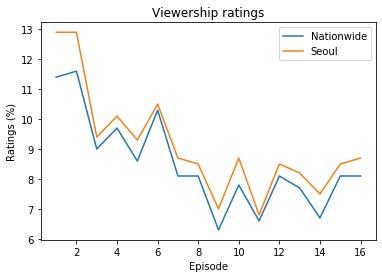

In [33]:
ratings['Nationwide'].plot(kind = 'line')
ratings['Seoul'].plot(kind = 'line')
plt.xlabel('Episode')
plt.ylabel('Ratings (%)')
plt.title('Viewership ratings')
plt.legend()

In [34]:
print('Average natonwide ratings: ', round(ratings['Nationwide'].mean(),2),'%')
print('Average Seoul ratings: ', round(ratings['Seoul'].mean(),2),'%')

Average natonwide ratings:  8.51 %
Average Seoul ratings:  9.14 %


### 4. Sentiment analysis 

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [36]:
def compound_score(compound): 
    if compound < 0:
        return 'negative'
    else:
        return 'positive'


In [37]:
df['scores'] = df['Review'].apply(lambda sentence: sid.polarity_scores(sentence))

# Obtaining compound score
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

# Determining sentiment based on compound score
df['pred_sentiment'] = df['compound'].apply(compound_score)

df.head()

,Review,scores,compound,pred_sentiment
0,I've just finished watching Mr.Sunshine. Altho...,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",0.6840,positive
1,"Worth watching, the story was nice and the act...","{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...",0.8316,positive
2,Done watching it with a smile...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive
3,Kdrama Addict I love the story... I watched Le...,"{'neg': 0.074, 'neu': 0.689, 'pos': 0.237, 'co...",0.9713,positive
4,One thing that turned me down about this movie...,"{'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'comp...",0.9436,positive


In [38]:
df['pred_sentiment'].value_counts()

positive    734
negative    146
Name: pred_sentiment, dtype: int64

Based on our model, approximately 83% of viewers enjoyed the drama.

In [39]:
print('Positive reviews:')
print('')
print(df[df['pred_sentiment'] == 'positive'].iloc[0,0])
print('\n')
print(df[df['pred_sentiment'] == 'positive'].iloc[1,0])
print('\n')
print(df[df['pred_sentiment'] == 'positive'].iloc[2,0])

Positive reviews:

I've just finished watching Mr.Sunshine. Although it's the same writer, the feeling is totally different. Mr.Sunshine is so epic and grand but The King Eternal Monarch is the opposite. I feel like watching The Heir Season 2. There are questions that left unanswered in the end.


Worth watching, the story was nice and the actors did a great job


Done watching it with a smile...


In [40]:
print('Negative reviews:')
print('')
print(df[df['pred_sentiment'] == 'negative'].iloc[0,0])
print('\n')
print(df[df['pred_sentiment'] == 'negative'].iloc[1,0])
print('\n')
print(df[df['pred_sentiment'] == 'negative'].iloc[2,0])

Negative reviews:

Okay...overall I think this drama was good. Their love story was cute. But am I the only one who found it confusing AF...???? I constantly had questions throughout the show. Way too many characters to keep track of. The ending wasn't bad.. but could have been better.(***SPOILER ahead***) It made me kind of sad that Sin Jae didn't know who they were...and Eun Sup didn't end up knowing who Lee Gon was?? like why? and Lee Gon and Tae Eul just went back and forth from one world to another for the rest of their lives?? Couldn't they at least get married or something? Like doesn't her dad question where she's going every weekend? Idk it just wasn't satisfying. Also, where did the teen version of the yoyo kid come from??? Some things just did not make sense! :?


I really don't like the drama from the very beginning, it was by far Lee min Ho poorest drama.the romance part of the drama was too early and very boring and all the time travelling and parallel universe of a thing